In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

csvlist = []

for csv in os.listdir('../logs/'):
    if '.csv' in csv:
        csvlist.append(os.path.join('../logs/', csv))

In [6]:
csvlist

['../logs/deberta-full-tfidf.csv',
 '../logs/deberta-full-tfidf-llrd.csv',
 '../logs/deberta-freeze.csv',
 '../logs/deberta-full-tfidf-llrd-unfreeze1.csv',
 '../logs/deberta-freeze-tfidf.csv',
 '../logs/sbert-freeze-tfidf.csv',
 '../logs/mlp.csv',
 '../logs/deberta-full-tfidf-lblr.csv',
 '../logs/deberta-full-finetune.csv']

In [7]:
result_df = pd.DataFrame([])
sel_cols = ['name', 'micro_f1', 'precision_macro', 'recall_macro', 'f1_macro', 'accuracy', 'support_macro']

for csv in csvlist:
    df = pd.read_csv(csv).drop(columns='Unnamed: 0')
    df['name'] = csv.split('/')[-1][:-4]
    df = df.loc[[df['f1_macro'].idxmax()]]
    result_df = pd.concat([result_df, df[sel_cols]])
    
result_df.sort_values('name').reset_index(drop=True) #.to_csv('consolidated_results.csv', index=False)

,name,micro_f1,precision_macro,recall_macro,f1_macro,accuracy,support_macro
0,deberta-freeze,0.719,0.737,0.719,0.695,0.719,3000.0
1,deberta-freeze-tfidf,0.802,0.807,0.802,0.797,0.802,3000.0
2,deberta-full-finetune,0.250,0.313,0.250,0.101,0.250,3000.0
3,deberta-full-tfidf,0.690,0.690,0.690,0.659,0.690,3000.0
4,deberta-full-tfidf-lblr,0.761,0.772,0.761,0.755,0.761,3000.0
5,deberta-full-tfidf-llrd,0.628,0.630,0.628,0.588,0.628,3000.0
6,deberta-full-tfidf-llrd-unfreeze1,0.698,0.693,0.698,0.676,0.698,3000.0
7,mlp,0.741,0.750,0.741,0.735,0.741,3000.0
8,sbert-freeze-tfidf,0.762,0.771,0.762,0.760,0.762,3000.0


In [9]:
result_df = pd.DataFrame([])
sel_cols = ['name', 'micro_f1', 'precision_macro', 'recall_macro', 'f1_macro', 'accuracy', 'support_macro']

for csv in csvlist:
    df = pd.read_csv(csv).drop(columns='Unnamed: 0')
    df['name'] = csv.split('/')[-1][:-4]
    df = df.loc[[df['f1_macro'].idxmax()]]
    result_df = pd.concat([result_df, df])
    
result_df.sort_values('name').reset_index(drop=True).to_csv('consolidated_results.csv', index=False)

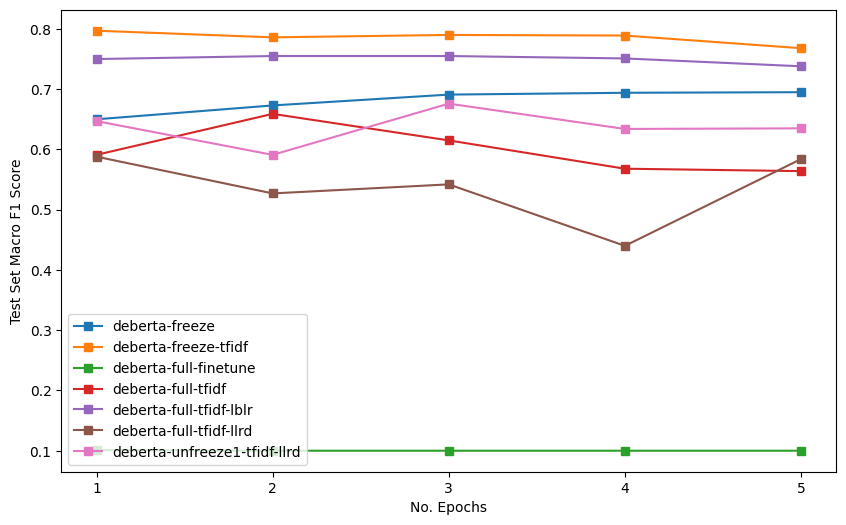

In [76]:
deberta_exps = [
    'deberta-freeze',
    'deberta-freeze-tfidf',
    'deberta-full-finetune',
    'deberta-full-tfidf',
    'deberta-full-tfidf-lblr',
    'deberta-full-tfidf-llrd',
    'deberta-full-tfidf-llrd-unfreeze1'
]

plt.figure(figsize=(10, 6))
trans_df = pd.DataFrame([])

for exp in deberta_exps:
    csv_path = f'../logs/{exp}.csv'
    df = pd.read_csv(csv_path)
    trans_df[exp] = df['f1_macro']
    
    if exp == 'deberta-full-tfidf-llrd-unfreeze1':
        exp = 'deberta-unfreeze1-tfidf-llrd'
    plt.plot(range(1, 6), df['f1_macro'], marker='s', label=exp)

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend(loc='lower left', ncol=1)
plt.ylabel('Test Set Macro F1 Score')
plt.xlabel('No. Epochs')
plt.show()